In [6]:
import os
import cv2
import imghdr
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
# Filter and move problematic images
data_dir = 'Plant-diseases'
problematic_dir = 'Problematic-images'
image_exts = {'jpeg', 'jpg', 'png'}  # Add more image extensions if needed

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            problematic_path = os.path.join(problematic_dir, image_class, image)
            if not os.path.exists(os.path.dirname(problematic_path)):
                os.makedirs(os.path.dirname(problematic_path))
                shutil.move(image_path, problematic_path)
# Load the image dataset
data = tf.keras.utils.image_dataset_from_directory('Plant-diseases')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

# Display class names and labels
class_names = ["Alternaria-alternata-fungus", "Anthracnose fungi", "Clubroot", "Common-mosaic-virus", "Furasium-wilt", "Stemphylium-leaf-blight", "White-rust"]
for label_num in batch[1]:
    class_name = class_names[label_num]
    print("Label number:", label_num, "Class name:", class_name)

# Scale the data
data = data.map(lambda x, y: (x / 255, y))
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

# Extract labels from the batch
train_labels = batch[1][:train_size]
val_labels = batch[1][train_size:train_size+val_size]

# Split data into training, validation, and test sets
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size + val_size).take(test_size)

# Define the number of classes
num_classes = len(class_names)

# Create the model
model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Convert target labels to one-hot encoded format
# Convert target labels to one-hot encoded format
train_labels_encoded = to_categorical(train_labels , num_classes=num_classes)  # Subtract 1 to match 0-based indexing
val_labels_encoded = to_categorical(val_labels, num_classes=num_classes)  # Subtract 1 to match 0-based indexing

# Set up TensorBoard callback
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# Define the EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
hist = model.fit(train_data, epochs=20, validation_data=val_data, callbacks=[tensorboard_callback,early_stopping])


/tmp/ipykernel_34720/2333450775.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Image not in ext list Plant-diseases/Stemphylium-leaf-blight/pdis-05-21-0903-fef4.gif


libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


Image not in ext list Plant-diseases/Stemphylium-leaf-blight/Pear_leaves_with_stemphylium_vesicarium.jpg
Image not in ext list Plant-diseases/Furasium-wilt/fusarium-wilt-american-phytopathological-society.jpg


libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


Image not in ext list Plant-diseases/Common-mosaic-virus/mosaic-virus.jpg
Image not in ext list Plant-diseases/Common-mosaic-virus/pdis-08-18-1307-re_f1.gif
Image not in ext list Plant-diseases/Alternaria-alternata-fungus/original.jpg


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


Image not in ext list Plant-diseases/Alternaria-alternata-fungus/Alternaria-alternata-Habitat-Life-Cycle-Morphology-Pathogenesis.jpg
Image not in ext list Plant-diseases/Alternaria-alternata-fungus/mpp_173_f1.gif
Image not in ext list Plant-diseases/Clubroot/30_GF1ClubrootSymptomsYaraGDixon-20131023110835725.gif
Image not in ext list Plant-diseases/Clubroot/Clubroot20shutterstock_635366381.jpg.webp
Found 1557 files belonging to 7 classes.


2023-08-29 11:44:15.896382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


Label number: 1 Class name: Anthracnose fungi
Label number: 3 Class name: Common-mosaic-virus
Label number: 4 Class name: Furasium-wilt
Label number: 0 Class name: Alternaria-alternata-fungus
Label number: 0 Class name: Alternaria-alternata-fungus
Label number: 1 Class name: Anthracnose fungi
Label number: 1 Class name: Anthracnose fungi
Label number: 0 Class name: Alternaria-alternata-fungus
Label number: 4 Class name: Furasium-wilt
Label number: 2 Class name: Clubroot
Label number: 4 Class name: Furasium-wilt
Label number: 3 Class name: Common-mosaic-virus
Label number: 2 Class name: Clubroot
Label number: 4 Class name: Furasium-wilt
Label number: 6 Class name: White-rust
Label number: 6 Class name: White-rust
Label number: 4 Class name: Furasium-wilt
Label number: 4 Class name: Furasium-wilt
Label number: 4 Class name: Furasium-wilt
Label number: 4 Class name: Furasium-wilt
Label number: 6 Class name: White-rust
Label number: 1 Class name: Anthracnose fungi
Label number: 1 Class nam

2023-08-29 11:44:18.627743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:44:19.661977: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.
2023-08-29 11:44:20.365366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-29 11:44:21.017755: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66064384 exceeds 10% of free system memory.
2023-08-29 11:44:21.017916: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.


 1/34 [..............................] - ETA: 2:09 - loss: 1.9741 - accuracy: 0.0625

2023-08-29 11:44:21.388714: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.
2023-08-29 11:44:22.124624: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66064384 exceeds 10% of free system memory.


 8/34 [======>.......................] - ETA: 26s - loss: 2.2788 - accuracy: 0.1445

2023-08-29 11:44:28.869487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


10/34 [=======>......................] - ETA: 24s - loss: 2.2104 - accuracy: 0.1406

2023-08-29 11:44:30.543249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


12/34 [=========>....................] - ETA: 21s - loss: 2.1603 - accuracy: 0.1589

2023-08-29 11:44:32.560987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


25/34 [=====================>........] - ETA: 8s - loss: 2.0247 - accuracy: 0.2350

2023-08-29 11:44:45.036865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - ETA: 0s - loss: 1.9862 - accuracy: 0.2463

2023-08-29 11:44:53.860090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:44:55.071716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-29 11:44:56.782444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:44:56.980457: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:44:57.222177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:44:58.692637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - 44s 1s/step - loss: 1.9862 - accuracy: 0.2463 - val_loss: 1.8089 - val_accuracy: 0.3021
Epoch 2/20


2023-08-29 11:45:01.801435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:45:03.316182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/34 [======>.......................] - ETA: 24s - loss: 1.8862 - accuracy: 0.2617

2023-08-29 11:45:10.743630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


10/34 [=======>......................] - ETA: 22s - loss: 1.8874 - accuracy: 0.2500

2023-08-29 11:45:12.457570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


12/34 [=========>....................] - ETA: 21s - loss: 1.8849 - accuracy: 0.2370

2023-08-29 11:45:14.622526: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


25/34 [=====================>........] - ETA: 9s - loss: 1.8509 - accuracy: 0.2775 

2023-08-29 11:45:28.372716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - ETA: 0s - loss: 1.8366 - accuracy: 0.2886

2023-08-29 11:45:38.829046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:45:40.231856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-29 11:45:42.172655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:45:42.463780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:45:42.729349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:45:44.280157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - 46s 1s/step - loss: 1.8366 - accuracy: 0.2886 - val_loss: 1.8208 - val_accuracy: 0.2535
Epoch 3/20


2023-08-29 11:45:47.629159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:45:49.175352: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/34 [======>.......................] - ETA: 28s - loss: 1.7569 - accuracy: 0.3281

2023-08-29 11:45:57.635870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


10/34 [=======>......................] - ETA: 25s - loss: 1.7427 - accuracy: 0.3344

2023-08-29 11:45:59.371610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


12/34 [=========>....................] - ETA: 22s - loss: 1.7489 - accuracy: 0.3307

2023-08-29 11:46:01.348434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


25/34 [=====================>........] - ETA: 8s - loss: 1.7498 - accuracy: 0.3237

2023-08-29 11:46:13.558241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - ETA: 0s - loss: 1.7265 - accuracy: 0.3327

2023-08-29 11:46:21.728357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:46:22.936556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-29 11:46:24.491636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:46:24.677395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:46:24.910067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:46:26.332851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - 42s 1s/step - loss: 1.7265 - accuracy: 0.3327 - val_loss: 1.6518 - val_accuracy: 0.3924
Epoch 4/20


2023-08-29 11:47:09.570561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:47:11.415175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/34 [======>.......................] - ETA: 30s - loss: 1.5144 - accuracy: 0.4062

2023-08-29 11:47:20.768916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


10/34 [=======>......................] - ETA: 28s - loss: 1.5273 - accuracy: 0.4031

2023-08-29 11:47:22.863063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


12/34 [=========>....................] - ETA: 25s - loss: 1.4878 - accuracy: 0.4427

2023-08-29 11:47:25.457195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


25/34 [=====================>........] - ETA: 9s - loss: 1.3952 - accuracy: 0.4925 

2023-08-29 11:47:38.323145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - ETA: 0s - loss: 1.4100 - accuracy: 0.4899

2023-08-29 11:47:47.015160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:47:48.207632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-29 11:47:49.787336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:47:49.984233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:47:50.215315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:47:51.692110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - 45s 1s/step - loss: 1.4100 - accuracy: 0.4899 - val_loss: 1.4106 - val_accuracy: 0.4965
Epoch 5/20


2023-08-29 11:47:54.863460: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:47:56.658136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/34 [======>.......................] - ETA: 30s - loss: 1.0662 - accuracy: 0.6094

2023-08-29 11:48:06.042051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


10/34 [=======>......................] - ETA: 28s - loss: 1.0246 - accuracy: 0.6344

2023-08-29 11:48:07.890531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


12/34 [=========>....................] - ETA: 24s - loss: 1.0022 - accuracy: 0.6484

2023-08-29 11:48:09.938007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


25/34 [=====================>........] - ETA: 9s - loss: 0.9585 - accuracy: 0.6550 

2023-08-29 11:48:22.006299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - ETA: 0s - loss: 0.9703 - accuracy: 0.6526

2023-08-29 11:48:29.967495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:48:31.400599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-29 11:48:32.970363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:48:33.167569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:48:33.399610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:48:34.807441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - 43s 1s/step - loss: 0.9703 - accuracy: 0.6526 - val_loss: 1.1058 - val_accuracy: 0.6250
Epoch 6/20


2023-08-29 11:48:37.923003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:48:39.545316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/34 [======>.......................] - ETA: 25s - loss: 0.5590 - accuracy: 0.8242

2023-08-29 11:48:47.644286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


10/34 [=======>......................] - ETA: 24s - loss: 0.5191 - accuracy: 0.8344

2023-08-29 11:48:49.584261: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


12/34 [=========>....................] - ETA: 22s - loss: 0.5302 - accuracy: 0.8229

2023-08-29 11:48:51.778036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


25/34 [=====================>........] - ETA: 9s - loss: 0.5537 - accuracy: 0.8150 

2023-08-29 11:49:06.348326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - ETA: 0s - loss: 0.6439 - accuracy: 0.7877

2023-08-29 11:49:14.404942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:49:15.613815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-29 11:49:17.188439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:49:17.371364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:49:17.600120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:49:19.023819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - 44s 1s/step - loss: 0.6439 - accuracy: 0.7877 - val_loss: 0.9949 - val_accuracy: 0.7222
Epoch 7/20


2023-08-29 11:49:21.997572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:49:23.637132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/34 [======>.......................] - ETA: 25s - loss: 0.3835 - accuracy: 0.8945

2023-08-29 11:49:31.361351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


10/34 [=======>......................] - ETA: 23s - loss: 0.4097 - accuracy: 0.8750

2023-08-29 11:49:33.021130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


12/34 [=========>....................] - ETA: 21s - loss: 0.4104 - accuracy: 0.8750

2023-08-29 11:49:35.138268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


25/34 [=====================>........] - ETA: 8s - loss: 0.3675 - accuracy: 0.8913

2023-08-29 11:49:47.712940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - ETA: 0s - loss: 0.3874 - accuracy: 0.8833

2023-08-29 11:49:56.472858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:49:57.721218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-29 11:49:59.339481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:49:59.555262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:49:59.802433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:50:01.326889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - 43s 1s/step - loss: 0.3874 - accuracy: 0.8833 - val_loss: 0.9536 - val_accuracy: 0.7361
Epoch 8/20


2023-08-29 11:50:04.579793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:50:06.071938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/34 [======>.......................] - ETA: 26s - loss: 0.2228 - accuracy: 0.9492

2023-08-29 11:50:14.038128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


10/34 [=======>......................] - ETA: 23s - loss: 0.2141 - accuracy: 0.9531

2023-08-29 11:50:15.621509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


12/34 [=========>....................] - ETA: 21s - loss: 0.1914 - accuracy: 0.9609

2023-08-29 11:50:17.533243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


25/34 [=====================>........] - ETA: 8s - loss: 0.1913 - accuracy: 0.9513

2023-08-29 11:50:29.804539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - ETA: 0s - loss: 0.2721 - accuracy: 0.9237

2023-08-29 11:50:37.788357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:50:38.903319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-29 11:50:40.468625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:50:40.659624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:50:40.896476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:50:42.311680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - 41s 1s/step - loss: 0.2721 - accuracy: 0.9237 - val_loss: 1.0162 - val_accuracy: 0.7500
Epoch 9/20


2023-08-29 11:50:45.314230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:50:46.775316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/34 [======>.......................] - ETA: 25s - loss: 0.2381 - accuracy: 0.9609

2023-08-29 11:50:54.542998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


10/34 [=======>......................] - ETA: 23s - loss: 0.2360 - accuracy: 0.9563

2023-08-29 11:50:56.160225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


12/34 [=========>....................] - ETA: 21s - loss: 0.2267 - accuracy: 0.9557

2023-08-29 11:50:58.245249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


25/34 [=====================>........] - ETA: 8s - loss: 0.1873 - accuracy: 0.9650

2023-08-29 11:51:11.202833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - ETA: 0s - loss: 0.2042 - accuracy: 0.9550

2023-08-29 11:51:19.415424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:51:20.549967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-29 11:51:22.055007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:51:22.241124: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:51:22.482434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:51:23.965324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - 42s 1s/step - loss: 0.2042 - accuracy: 0.9550 - val_loss: 0.7503 - val_accuracy: 0.8403
Epoch 10/20


2023-08-29 11:51:26.944237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:51:28.449998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/34 [======>.......................] - ETA: 25s - loss: 0.0953 - accuracy: 0.9883

2023-08-29 11:51:36.236255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


10/34 [=======>......................] - ETA: 23s - loss: 0.0861 - accuracy: 0.9906

2023-08-29 11:51:37.811220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


12/34 [=========>....................] - ETA: 21s - loss: 0.0869 - accuracy: 0.9896

2023-08-29 11:51:39.828472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


25/34 [=====================>........] - ETA: 8s - loss: 0.0788 - accuracy: 0.9862

2023-08-29 11:51:51.857733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - ETA: 0s - loss: 0.0869 - accuracy: 0.9807

2023-08-29 11:52:00.529829: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:52:01.659553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-29 11:52:03.193992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:52:03.384166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:52:03.615130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:52:05.089221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - 41s 1s/step - loss: 0.0869 - accuracy: 0.9807 - val_loss: 0.8880 - val_accuracy: 0.8403
Epoch 11/20


2023-08-29 11:52:08.230476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:52:09.958161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/34 [======>.......................] - ETA: 26s - loss: 0.0381 - accuracy: 0.9922

2023-08-29 11:52:17.970691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


10/34 [=======>......................] - ETA: 24s - loss: 0.0365 - accuracy: 0.9906

2023-08-29 11:52:19.633672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


12/34 [=========>....................] - ETA: 21s - loss: 0.0346 - accuracy: 0.9922

2023-08-29 11:52:21.761104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


25/34 [=====================>........] - ETA: 8s - loss: 0.0539 - accuracy: 0.9900

2023-08-29 11:52:33.993782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - ETA: 0s - loss: 0.0649 - accuracy: 0.9862

2023-08-29 11:52:42.554529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:52:43.841575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-29 11:52:45.421637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:52:45.611315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:52:45.853005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:52:47.415911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - 42s 1s/step - loss: 0.0649 - accuracy: 0.9862 - val_loss: 0.8536 - val_accuracy: 0.8646
Epoch 12/20


2023-08-29 11:53:30.146994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:53:31.502954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/34 [======>.......................] - ETA: 23s - loss: 0.0684 - accuracy: 0.9805

2023-08-29 11:53:38.851333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


10/34 [=======>......................] - ETA: 22s - loss: 0.0578 - accuracy: 0.9844

2023-08-29 11:53:40.484104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


12/34 [=========>....................] - ETA: 20s - loss: 0.0516 - accuracy: 0.9870

2023-08-29 11:53:42.456398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


25/34 [=====================>........] - ETA: 8s - loss: 0.0393 - accuracy: 0.9912

2023-08-29 11:53:54.155893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - ETA: 0s - loss: 0.0506 - accuracy: 0.9899

2023-08-29 11:54:02.296511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:54:03.417928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-29 11:54:04.875075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:54:05.063991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:54:05.294674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:54:06.716030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - 40s 1s/step - loss: 0.0506 - accuracy: 0.9899 - val_loss: 1.0331 - val_accuracy: 0.8542
Epoch 13/20


2023-08-29 11:54:09.686964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:54:11.241458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/34 [======>.......................] - ETA: 24s - loss: 0.0311 - accuracy: 0.9961

2023-08-29 11:54:18.702141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


10/34 [=======>......................] - ETA: 22s - loss: 0.0274 - accuracy: 0.9969

2023-08-29 11:54:20.415544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


12/34 [=========>....................] - ETA: 20s - loss: 0.0242 - accuracy: 0.9974

2023-08-29 11:54:22.379323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


25/34 [=====================>........] - ETA: 8s - loss: 0.0201 - accuracy: 0.9975

2023-08-29 11:54:34.840080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - ETA: 0s - loss: 0.0394 - accuracy: 0.9954

2023-08-29 11:54:42.854266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:54:44.019175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-29 11:54:45.489172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:54:45.675837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:54:45.898297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:54:47.293644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - 41s 1s/step - loss: 0.0394 - accuracy: 0.9954 - val_loss: 0.8823 - val_accuracy: 0.8438
Epoch 14/20


2023-08-29 11:54:50.233730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:54:51.736591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/34 [======>.......................] - ETA: 26s - loss: 0.0295 - accuracy: 0.9961

2023-08-29 11:54:59.769138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


10/34 [=======>......................] - ETA: 24s - loss: 0.0260 - accuracy: 0.9969

2023-08-29 11:55:01.457112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


12/34 [=========>....................] - ETA: 21s - loss: 0.0236 - accuracy: 0.9974

2023-08-29 11:55:03.491640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


25/34 [=====================>........] - ETA: 8s - loss: 0.0204 - accuracy: 0.9975

2023-08-29 11:55:15.881912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9954

2023-08-29 11:55:24.228814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:55:25.411004: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-29 11:55:26.919065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:55:27.114864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:55:27.345558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 11:55:28.770802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/34 [==============================] - 42s 1s/step - loss: 0.0253 - accuracy: 0.9954 - val_loss: 1.2088 - val_accuracy: 0.8264


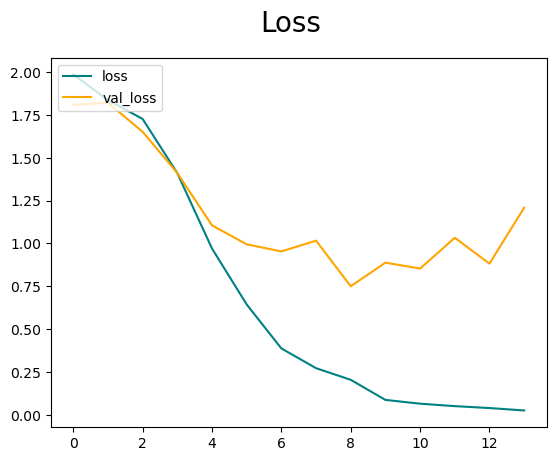

In [9]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

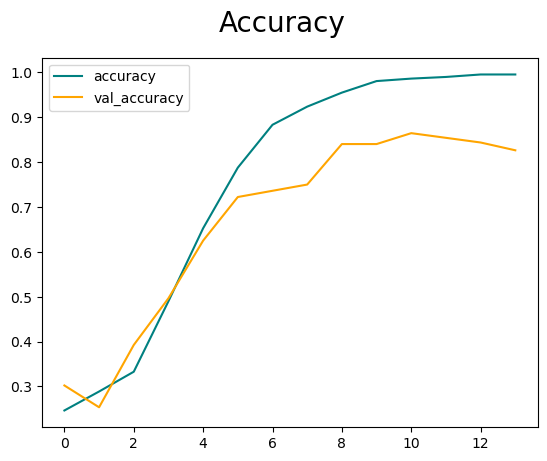

In [10]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [13]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [14]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [15]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat_probs = model.predict(X)
    yhat_labels = np.argmax(yhat_probs, axis=1)  # Get the predicted class labels
    pre.update_state(y, yhat_labels)
    re.update_state(y, yhat_labels)
    acc.update_state(y, yhat_labels)

2023-08-29 12:18:41.306831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 12:18:42.491058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-29 12:18:44.039831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 12:18:44.226070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 12:18:44.468908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2023-08-29 12:18:45.914597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


1/1 [==============================] - 0s 238ms/step


In [16]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()},BinaryAccuracy:{acc.result().numpy()}')


Precision:0.9482758641242981, Recall:0.9649122953414917,BinaryAccuracy:0.1796875


In [78]:
import cv2

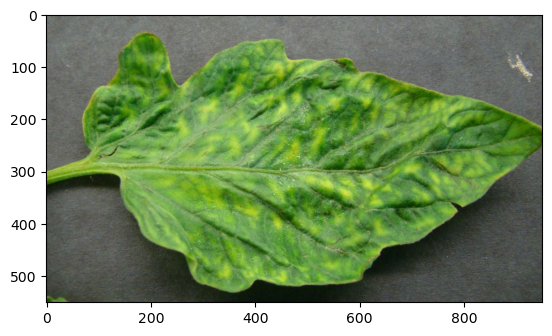

In [79]:
img = cv2.imread('Mosaic-Virustest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

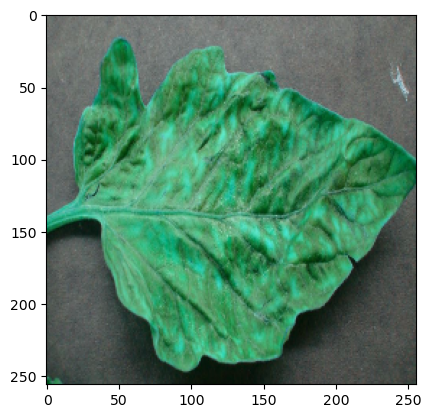

In [80]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [81]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [82]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 31ms/step


In [83]:
yhat

array([[0.04192359, 0.07385141, 0.10382949, 0.2501328 , 0.08348795,
        0.31908008, 0.12769471]], dtype=float32)

In [65]:
from tensorflow.keras.models import load_model
import os

In [66]:
model.save(os.path.join('models','cropDiseases.h5'))


/home/brian/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
new_model = load_model(os.path.join('models','cropDiseases.h5'))


In [68]:
new_model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 76ms/step


array([[4.0529864e-07, 8.1411540e-04, 4.6600121e-06, 9.9307901e-01,
        6.0932776e-03, 9.4561315e-08, 8.3673685e-06]], dtype=float32)